In [2]:
import json
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten,Dropout,Bidirectional

In [3]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
tf.compat.v1.disable_eager_execution()

In [4]:
import io
import re
import string
import tqdm
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
with open('chat.json') as content:
    chat = json.load(content)

In [7]:
tags = []
inputs = []
responses={}
for intent in chat['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [8]:
data = pd.DataFrame({"inputs":inputs, "tags":tags})

In [9]:
#Shuffle DataFrame
data.sample(frac=1)

,inputs,tags
82,tem como me curar de transtornos mentais?,cura
95,o que posso fazer se eu me sentir sozinho?,sozinho
50,quem a doença mental afeta?,quemafeta
6,prazer em conheca-lo(a),saudacao
5,"ola, fred",saudacao
...,...,...
36,tudo certo?,estar
85,causas de problemas de transtornos mentais?,causas
37,como tu ta?,estar
15,obrigado,tchau


In [17]:
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [18]:
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
x_train = pad_sequences(train)

In [19]:
vocabulary = len(tokenizer.word_index)

In [20]:
vocabulary, x_train.shape, y_train.shape

(127, (101, 10), (101,))

In [67]:
#creating the model
model = tf.keras.Sequential()

model.add(Embedding(vocabulary, x_train.shape[1], mask_zero=True))
model.add(LSTM(15))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(le.classes_.shape[0], activation='softmax'))


In [68]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])


In [69]:
train = model.fit(x_train,y_train,epochs=1000)

Train on 101 samples
Epoch 1/1000
101/101 [==============================] - 0s 5ms/sample - loss: 2.6399 - accuracy: 0.0396
Epoch 2/1000
101/101 [==============================] - 0s 350us/sample - loss: 2.6375 - accuracy: 0.0495
Epoch 3/1000
101/101 [==============================] - 0s 311us/sample - loss: 2.6343 - accuracy: 0.1188
Epoch 4/1000
101/101 [==============================] - 0s 318us/sample - loss: 2.6331 - accuracy: 0.0891
Epoch 5/1000
101/101 [==============================] - 0s 338us/sample - loss: 2.6286 - accuracy: 0.1782
Epoch 6/1000
101/101 [==============================] - 0s 323us/sample - loss: 2.6259 - accuracy: 0.1782
Epoch 7/1000
101/101 [==============================] - 0s 322us/sample - loss: 2.6247 - accuracy: 0.2178
Epoch 8/1000
101/101 [==============================] - 0s 316us/sample - loss: 2.6210 - accuracy: 0.2376
Epoch 9/1000
101/101 [==============================] - 0s 325us/sample - loss: 2.6168 - accuracy: 0.2574
Epoch 10/1000
101/101 [====

101/101 [==============================] - 0s 335us/sample - loss: 1.4527 - accuracy: 0.7228
Epoch 78/1000
101/101 [==============================] - 0s 323us/sample - loss: 1.4409 - accuracy: 0.6733
Epoch 79/1000
101/101 [==============================] - 0s 322us/sample - loss: 1.4413 - accuracy: 0.6535
Epoch 80/1000
101/101 [==============================] - 0s 318us/sample - loss: 1.4154 - accuracy: 0.7228
Epoch 81/1000
101/101 [==============================] - 0s 326us/sample - loss: 1.4235 - accuracy: 0.7030
Epoch 82/1000
101/101 [==============================] - 0s 313us/sample - loss: 1.4053 - accuracy: 0.6832
Epoch 83/1000
101/101 [==============================] - 0s 314us/sample - loss: 1.3559 - accuracy: 0.7129
Epoch 84/1000
101/101 [==============================] - 0s 315us/sample - loss: 1.3346 - accuracy: 0.7030
Epoch 85/1000
101/101 [==============================] - 0s 327us/sample - loss: 1.3919 - accuracy: 0.7525
Epoch 86/1000
101/101 [============================

101/101 [==============================] - 0s 348us/sample - loss: 0.7849 - accuracy: 0.8317
Epoch 154/1000
101/101 [==============================] - 0s 324us/sample - loss: 0.8148 - accuracy: 0.8020
Epoch 155/1000
101/101 [==============================] - 0s 322us/sample - loss: 0.7065 - accuracy: 0.8218
Epoch 156/1000
101/101 [==============================] - 0s 316us/sample - loss: 0.7528 - accuracy: 0.7822
Epoch 157/1000
101/101 [==============================] - 0s 332us/sample - loss: 0.8014 - accuracy: 0.8119
Epoch 158/1000
101/101 [==============================] - 0s 311us/sample - loss: 0.7641 - accuracy: 0.8317
Epoch 159/1000
101/101 [==============================] - 0s 319us/sample - loss: 0.8060 - accuracy: 0.8218
Epoch 160/1000
101/101 [==============================] - 0s 348us/sample - loss: 0.8528 - accuracy: 0.7822
Epoch 161/1000
101/101 [==============================] - 0s 332us/sample - loss: 0.7947 - accuracy: 0.8218
Epoch 162/1000
101/101 [===================

Epoch 229/1000
101/101 [==============================] - 0s 324us/sample - loss: 0.5938 - accuracy: 0.8416
Epoch 230/1000
101/101 [==============================] - 0s 312us/sample - loss: 0.4566 - accuracy: 0.8812
Epoch 231/1000
101/101 [==============================] - 0s 312us/sample - loss: 0.5246 - accuracy: 0.8614
Epoch 232/1000
101/101 [==============================] - 0s 314us/sample - loss: 0.5059 - accuracy: 0.8911
Epoch 233/1000
101/101 [==============================] - 0s 317us/sample - loss: 0.5165 - accuracy: 0.8416
Epoch 234/1000
101/101 [==============================] - 0s 323us/sample - loss: 0.4931 - accuracy: 0.9109
Epoch 235/1000
101/101 [==============================] - 0s 316us/sample - loss: 0.4498 - accuracy: 0.9010
Epoch 236/1000
101/101 [==============================] - 0s 319us/sample - loss: 0.4750 - accuracy: 0.9010
Epoch 237/1000
101/101 [==============================] - 0s 326us/sample - loss: 0.5074 - accuracy: 0.8614
Epoch 238/1000
101/101 [====

101/101 [==============================] - 0s 315us/sample - loss: 0.3870 - accuracy: 0.9010
Epoch 305/1000
101/101 [==============================] - 0s 337us/sample - loss: 0.4274 - accuracy: 0.9208
Epoch 306/1000
101/101 [==============================] - 0s 322us/sample - loss: 0.4764 - accuracy: 0.8614
Epoch 307/1000
101/101 [==============================] - 0s 328us/sample - loss: 0.4558 - accuracy: 0.9109
Epoch 308/1000
101/101 [==============================] - 0s 315us/sample - loss: 0.3730 - accuracy: 0.9307
Epoch 309/1000
101/101 [==============================] - 0s 316us/sample - loss: 0.4365 - accuracy: 0.8713
Epoch 310/1000
101/101 [==============================] - 0s 315us/sample - loss: 0.4017 - accuracy: 0.8713
Epoch 311/1000
101/101 [==============================] - 0s 377us/sample - loss: 0.4021 - accuracy: 0.8812
Epoch 312/1000
101/101 [==============================] - 0s 314us/sample - loss: 0.3880 - accuracy: 0.9010
Epoch 313/1000
101/101 [===================

Epoch 380/1000
101/101 [==============================] - 0s 316us/sample - loss: 0.3048 - accuracy: 0.9406
Epoch 381/1000
101/101 [==============================] - 0s 311us/sample - loss: 0.3093 - accuracy: 0.9208
Epoch 382/1000
101/101 [==============================] - 0s 330us/sample - loss: 0.2702 - accuracy: 0.9208
Epoch 383/1000
101/101 [==============================] - 0s 315us/sample - loss: 0.2847 - accuracy: 0.9208
Epoch 384/1000
101/101 [==============================] - 0s 322us/sample - loss: 0.3523 - accuracy: 0.8911
Epoch 385/1000
101/101 [==============================] - 0s 318us/sample - loss: 0.3877 - accuracy: 0.8812
Epoch 386/1000
101/101 [==============================] - 0s 326us/sample - loss: 0.3278 - accuracy: 0.9208
Epoch 387/1000
101/101 [==============================] - 0s 318us/sample - loss: 0.3289 - accuracy: 0.9406
Epoch 388/1000
101/101 [==============================] - 0s 320us/sample - loss: 0.3191 - accuracy: 0.9307
Epoch 389/1000
101/101 [====

101/101 [==============================] - 0s 321us/sample - loss: 0.2834 - accuracy: 0.9307
Epoch 456/1000
101/101 [==============================] - 0s 327us/sample - loss: 0.2236 - accuracy: 0.9802
Epoch 457/1000
101/101 [==============================] - 0s 322us/sample - loss: 0.2313 - accuracy: 0.9505
Epoch 458/1000
101/101 [==============================] - 0s 324us/sample - loss: 0.3820 - accuracy: 0.9010
Epoch 459/1000
101/101 [==============================] - 0s 327us/sample - loss: 0.3197 - accuracy: 0.8911
Epoch 460/1000
101/101 [==============================] - 0s 327us/sample - loss: 0.2918 - accuracy: 0.9208
Epoch 461/1000
101/101 [==============================] - 0s 313us/sample - loss: 0.2409 - accuracy: 0.9604
Epoch 462/1000
101/101 [==============================] - 0s 316us/sample - loss: 0.2674 - accuracy: 0.9505
Epoch 463/1000
101/101 [==============================] - 0s 311us/sample - loss: 0.2609 - accuracy: 0.9604
Epoch 464/1000
101/101 [===================

Epoch 531/1000
101/101 [==============================] - 0s 331us/sample - loss: 0.2425 - accuracy: 0.9802
Epoch 532/1000
101/101 [==============================] - 0s 314us/sample - loss: 0.2682 - accuracy: 0.9109
Epoch 533/1000
101/101 [==============================] - 0s 318us/sample - loss: 0.2192 - accuracy: 0.9406
Epoch 534/1000
101/101 [==============================] - 0s 314us/sample - loss: 0.3006 - accuracy: 0.9010
Epoch 535/1000
101/101 [==============================] - 0s 312us/sample - loss: 0.2641 - accuracy: 0.9208
Epoch 536/1000
101/101 [==============================] - 0s 329us/sample - loss: 0.1969 - accuracy: 0.9802
Epoch 537/1000
101/101 [==============================] - 0s 322us/sample - loss: 0.2330 - accuracy: 0.9010
Epoch 538/1000
101/101 [==============================] - 0s 316us/sample - loss: 0.2598 - accuracy: 0.9406
Epoch 539/1000
101/101 [==============================] - 0s 322us/sample - loss: 0.2363 - accuracy: 0.9604
Epoch 540/1000
101/101 [====

101/101 [==============================] - 0s 331us/sample - loss: 0.2150 - accuracy: 0.9604
Epoch 607/1000
101/101 [==============================] - 0s 314us/sample - loss: 0.2528 - accuracy: 0.9307
Epoch 608/1000
101/101 [==============================] - 0s 319us/sample - loss: 0.3589 - accuracy: 0.8515
Epoch 609/1000
101/101 [==============================] - 0s 317us/sample - loss: 0.1825 - accuracy: 0.9802
Epoch 610/1000
101/101 [==============================] - 0s 335us/sample - loss: 0.2081 - accuracy: 0.9505
Epoch 611/1000
101/101 [==============================] - 0s 333us/sample - loss: 0.2060 - accuracy: 0.9505
Epoch 612/1000
101/101 [==============================] - 0s 319us/sample - loss: 0.2853 - accuracy: 0.8911
Epoch 613/1000
101/101 [==============================] - 0s 317us/sample - loss: 0.2359 - accuracy: 0.9208
Epoch 614/1000
101/101 [==============================] - 0s 329us/sample - loss: 0.1678 - accuracy: 0.9703
Epoch 615/1000
101/101 [===================

Epoch 682/1000
101/101 [==============================] - 0s 315us/sample - loss: 0.2066 - accuracy: 0.9406
Epoch 683/1000
101/101 [==============================] - 0s 327us/sample - loss: 0.1803 - accuracy: 0.9505
Epoch 684/1000
101/101 [==============================] - 0s 315us/sample - loss: 0.2489 - accuracy: 0.9109
Epoch 685/1000
101/101 [==============================] - 0s 317us/sample - loss: 0.1437 - accuracy: 0.9604
Epoch 686/1000
101/101 [==============================] - 0s 320us/sample - loss: 0.2419 - accuracy: 0.9208
Epoch 687/1000
101/101 [==============================] - 0s 335us/sample - loss: 0.2153 - accuracy: 0.9505
Epoch 688/1000
101/101 [==============================] - 0s 337us/sample - loss: 0.2322 - accuracy: 0.9505
Epoch 689/1000
101/101 [==============================] - 0s 323us/sample - loss: 0.2540 - accuracy: 0.8812
Epoch 690/1000
101/101 [==============================] - 0s 321us/sample - loss: 0.1566 - accuracy: 0.9802
Epoch 691/1000
101/101 [====

101/101 [==============================] - 0s 316us/sample - loss: 0.1819 - accuracy: 0.9406
Epoch 758/1000
101/101 [==============================] - 0s 329us/sample - loss: 0.1295 - accuracy: 0.9604
Epoch 759/1000
101/101 [==============================] - 0s 317us/sample - loss: 0.2191 - accuracy: 0.9406
Epoch 760/1000
101/101 [==============================] - 0s 318us/sample - loss: 0.1944 - accuracy: 0.9307
Epoch 761/1000
101/101 [==============================] - 0s 324us/sample - loss: 0.2320 - accuracy: 0.9208
Epoch 762/1000
101/101 [==============================] - 0s 318us/sample - loss: 0.1395 - accuracy: 0.9802
Epoch 763/1000
101/101 [==============================] - 0s 326us/sample - loss: 0.1438 - accuracy: 0.9703
Epoch 764/1000
101/101 [==============================] - 0s 326us/sample - loss: 0.2037 - accuracy: 0.9505
Epoch 765/1000
101/101 [==============================] - 0s 327us/sample - loss: 0.2044 - accuracy: 0.9406
Epoch 766/1000
101/101 [===================

Epoch 833/1000
101/101 [==============================] - 0s 314us/sample - loss: 0.1688 - accuracy: 0.9505
Epoch 834/1000
101/101 [==============================] - 0s 317us/sample - loss: 0.1968 - accuracy: 0.9406
Epoch 835/1000
101/101 [==============================] - 0s 316us/sample - loss: 0.1497 - accuracy: 0.9406
Epoch 836/1000
101/101 [==============================] - 0s 307us/sample - loss: 0.1600 - accuracy: 0.9604
Epoch 837/1000
101/101 [==============================] - 0s 315us/sample - loss: 0.2247 - accuracy: 0.9208
Epoch 838/1000
101/101 [==============================] - 0s 311us/sample - loss: 0.1391 - accuracy: 0.9604
Epoch 839/1000
101/101 [==============================] - 0s 322us/sample - loss: 0.1726 - accuracy: 0.9406
Epoch 840/1000
101/101 [==============================] - 0s 315us/sample - loss: 0.1585 - accuracy: 0.9406
Epoch 841/1000
101/101 [==============================] - 0s 310us/sample - loss: 0.1715 - accuracy: 0.9604
Epoch 842/1000
101/101 [====

101/101 [==============================] - 0s 330us/sample - loss: 0.1689 - accuracy: 0.9406
Epoch 909/1000
101/101 [==============================] - 0s 329us/sample - loss: 0.1856 - accuracy: 0.9406
Epoch 910/1000
101/101 [==============================] - 0s 322us/sample - loss: 0.1102 - accuracy: 0.9802
Epoch 911/1000
101/101 [==============================] - 0s 331us/sample - loss: 0.1631 - accuracy: 0.9703
Epoch 912/1000
101/101 [==============================] - 0s 330us/sample - loss: 0.2006 - accuracy: 0.9307
Epoch 913/1000
101/101 [==============================] - 0s 320us/sample - loss: 0.2590 - accuracy: 0.8713
Epoch 914/1000
101/101 [==============================] - 0s 320us/sample - loss: 0.1811 - accuracy: 0.9505
Epoch 915/1000
101/101 [==============================] - 0s 316us/sample - loss: 0.2391 - accuracy: 0.8812
Epoch 916/1000
101/101 [==============================] - 0s 317us/sample - loss: 0.1693 - accuracy: 0.9406
Epoch 917/1000
101/101 [===================

Epoch 984/1000
101/101 [==============================] - 0s 316us/sample - loss: 0.1701 - accuracy: 0.9703
Epoch 985/1000
101/101 [==============================] - 0s 325us/sample - loss: 0.1691 - accuracy: 0.9604
Epoch 986/1000
101/101 [==============================] - 0s 328us/sample - loss: 0.1752 - accuracy: 0.9604
Epoch 987/1000
101/101 [==============================] - 0s 319us/sample - loss: 0.1726 - accuracy: 0.9703
Epoch 988/1000
101/101 [==============================] - 0s 316us/sample - loss: 0.1544 - accuracy: 0.9604
Epoch 989/1000
101/101 [==============================] - 0s 321us/sample - loss: 0.1291 - accuracy: 0.9604
Epoch 990/1000
101/101 [==============================] - 0s 312us/sample - loss: 0.1886 - accuracy: 0.9406
Epoch 991/1000
101/101 [==============================] - 0s 321us/sample - loss: 0.1756 - accuracy: 0.9406
Epoch 992/1000
101/101 [==============================] - 0s 327us/sample - loss: 0.1282 - accuracy: 0.9604
Epoch 993/1000
101/101 [====

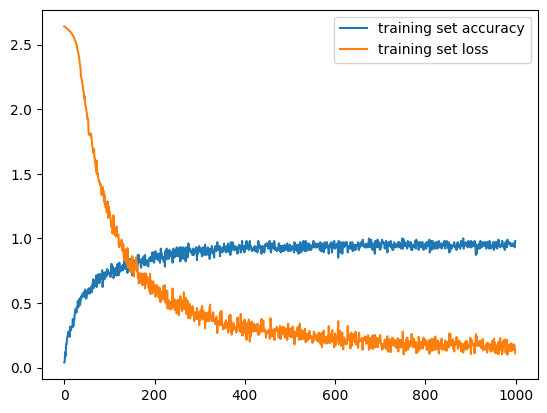

In [70]:
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [71]:
#chatting
import random


while True:
    texts_p = []
    prediction_input = input('Você : ')

    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    #tokenizing and padding
    tokenizer.fit_on_texts(texts_p)
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],x_train.shape[1])

   #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Freudolino : ",random.choice(responses[response_tag]))
    if response_tag == "tchau":
        break

Você : Olá
Freudolino :  Desafios ou problemas com sua saúde mental podem surgir de questões psicológicas, biológicas e sociais, bem como de eventos da vida.
Você : estou muito triste
Freudolino :  Todo mundo se sente solitário às vezes, talvez você tenha se mudado recentemente para uma nova cidade, esteja mudando seu círculo de amigos, tenha perdido alguém importante em sua vida ou perdido seu emprego e também perdeu importantes conexões sociais com colegas de trabalho.
Você : como voce esta?
Freudolino :  Os sintoms em adultos podem ser: 
 Tristeza ou irritabilidade de longa duração 
 Altos e baixos extremos no humor 
 Medo excessivo 
 Preocupação ou ansiedade 
 Retraimento social 
 Mudanças drásticas nos hábitos alimentares ou de sono 
 Fortes sentimentos de raiva 
 Delírios ou alucinações 
 Incapacidade crescente de lidar com problemas e atividades diárias 
 Pensamentos de suicídio 
 Negação de problemas óbvios 
 Muitos problemas físicos inexplicáveis 
 Abuso de drogas e/ou álcool 